In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [47]:
ms=tf.keras.models.load_model('emotionDetector')

In [48]:
def get_Face(img):
    faceCascade = cv2.CascadeClassifier('C:/Users/lodha/Downloads/haarcascades/haarcascades/haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    face_roi = img
    
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        face_roi = roi_color
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 4)
        facess=faceCascade.detectMultiScale(roi_gray) 
        if(len(facess)==0):
            print("NO FACE FOUND")
        else:
            for(ex,ey,ew,eh) in facess:
                print("found")
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]
                
    return img,face_roi

In [49]:
def get_Class(image):
    final_img = cv2.resize(get_Face(image)[1],(224,224))
    final_img = np.expand_dims(final_img,axis=0)
    final_img = final_img/255.0
    pred = ms.predict(final_img)
     
    print(pred)
    return classes[np.argmax(pred)]
    

In [50]:
import cv2

frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(0)

cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, 150)


while True:
    _, img = cap.read()
    
    c = get_Class(img)
    cv2.putText(img,  c, (300, 200), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 150, 0), 3)
    
    cv2.imshow('Result', img)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[0.6529676  0.00618039 0.13035363 0.13288078 0.02705504 0.0461603
  0.00440222]]
[[5.7630363e-08 8.9930764e-11 2.5533500e-06 9.5572830e-07 9.9998462e-01
  1.1657875e-05 5.9825716e-08]]
[[1.1344493e-06 3.8289327e-09 9.9985182e-06 2.1005014e-06 9.9996018e-01
  2.6365131e-05 2.3577178e-07]]
[[2.6752978e-08 4.0102286e-11 3.3474970e-07 1.8070373e-06 9.9999118e-01
  6.6609541e-06 4.0167794e-08]]
[[7.6705957e-09 7.0609083e-12 4.5938503e-08 7.1087027e-07 9.9999762e-01
  1.7226365e-06 7.9939158e-09]]
[[5.6993784e-08 1.3501432e-10 3.5298271e-07 1.7098260e-05 9.9997234e-01
  9.9294430e-06 1.9565036e-07]]
NO FACE FOUND
[[4.3408936e-06 3.1211178e-09 1.4521920e-06 2.3396560e-06 9.9981195e-01
  1.8001402e-04 4.8658691e-08]]
[[6.7008557e-07 3.9606904e-09 7.9433730e-06 1.2146066e-05 9.9993515e-01
  4.3190972e-05 9.7849636e-07]]
[[6.7008557e-07 3.9606904e-09 7.9433730e-06 1.2146066e-05 9.9993515e-01
  4.3190972e-05 9.7849636e-07]]
[[1.8389223e-07 1.0866757e-09 7.8419123e-07 5.8670707e-06 9.9997890e-01


found
[[2.1882220e-10 9.7616126e-15 3.8669675e-11 4.4835918e-13 1.0000000e+00
  7.4987145e-09 1.1706944e-14]]
found
[[5.2748650e-10 2.9793323e-12 7.3140299e-10 2.7380400e-11 1.0000000e+00
  8.1210132e-09 3.7328521e-12]]
found
[[3.3902525e-09 2.6437569e-10 1.6563201e-08 1.7307967e-08 9.9999988e-01
  1.1533324e-07 5.7601541e-09]]
found
[[4.8979505e-09 2.4995749e-11 1.8968980e-09 7.2440123e-11 1.0000000e+00
  2.2114184e-08 1.2952248e-11]]
found
[[4.9893339e-10 1.4466884e-13 4.2571297e-11 7.5721512e-11 1.0000000e+00
  3.7125718e-09 5.8796479e-13]]
found
[[3.3508321e-09 2.9974090e-14 1.2289172e-10 2.6606438e-13 1.0000000e+00
  1.5423533e-08 3.1288067e-15]]
found
[[1.5852100e-10 8.2656956e-15 1.8153760e-11 7.9953974e-13 1.0000000e+00
  3.8442400e-09 7.9698101e-15]]
found
[[6.1814116e-11 1.0542030e-13 3.0341462e-11 3.0423043e-12 1.0000000e+00
  2.4152913e-09 1.0027552e-13]]
found
[[3.9667611e-09 6.5571660e-14 3.4239247e-11 7.9292437e-13 1.0000000e+00
  3.5110592e-09 5.6708348e-15]]
found
[[6.

found
[[4.5081947e-09 2.2554808e-13 4.1146225e-11 1.1339297e-10 1.0000000e+00
  3.5990551e-09 4.3042027e-13]]
found
[[3.74388506e-11 1.06193516e-15 5.40850481e-12 1.85062330e-11
  1.00000000e+00 2.06270712e-09 1.05923774e-13]]
found
[[5.8564664e-10 1.4827337e-13 5.0711990e-11 3.1120428e-10 1.0000000e+00
  3.6714753e-09 3.3203082e-12]]
found
[[8.8420257e-11 1.9895646e-15 1.5041156e-11 5.1973512e-12 1.0000000e+00
  3.4350611e-09 6.2059861e-14]]
found
[[1.3677334e-10 4.8598935e-15 7.6089491e-12 3.3858665e-12 1.0000000e+00
  1.4824993e-09 7.0568788e-14]]
found
[[1.2824769e-10 1.0105688e-15 3.0708652e-12 2.9222865e-12 1.0000000e+00
  1.0675252e-09 1.2274764e-14]]
found
[[1.0116654e-09 2.8751812e-12 7.5492396e-10 5.0732263e-09 1.0000000e+00
  1.6378916e-08 2.1390857e-10]]
found
[[2.9391725e-09 1.3028996e-13 8.4035688e-11 2.0278985e-09 1.0000000e+00
  9.5199226e-09 1.1516695e-11]]
found
[[8.17180323e-10 1.30989132e-13 1.06597633e-10 1.61792912e-09
  1.00000000e+00 7.18041049e-09 1.20403522e-1

found
[[2.2105372e-08 1.0202364e-12 1.7397910e-10 1.3441871e-08 1.0000000e+00
  1.7293910e-08 5.2395161e-11]]
found
[[2.0622222e-10 6.7785357e-15 7.7704111e-12 4.6497275e-10 1.0000000e+00
  2.2201108e-09 1.2304406e-12]]
found
[[1.8533372e-08 6.2547918e-12 1.2730696e-08 4.2344024e-11 9.9999905e-01
  9.7696807e-07 2.0009673e-12]]
found
[[1.7106453e-08 1.1228874e-12 1.6408079e-09 3.4338588e-11 9.9999988e-01
  1.2701801e-07 1.2009749e-12]]
found
[[7.6984330e-09 1.2182831e-12 1.3301058e-09 3.2679152e-12 1.0000000e+00
  5.7532514e-08 3.7059987e-13]]
found
[[1.0969118e-07 1.8520089e-09 8.2141622e-07 9.9928732e-11 9.9999785e-01
  1.1797998e-06 3.2597813e-10]]
found
[[1.3851535e-05 5.7782246e-09 1.4033711e-07 3.2025749e-09 9.9998498e-01
  1.1142622e-06 2.0728397e-09]]
found
[[1.2220337e-08 9.7883597e-11 9.8758576e-08 3.3300421e-11 9.9999905e-01
  8.8740347e-07 5.3542127e-12]]
found
[[5.2081774e-08 7.6652112e-10 1.6592605e-08 2.5086960e-08 9.9999976e-01
  1.3191934e-07 3.3282570e-09]]
found
[[3.

In [51]:
frame = cv2.imread("C:/Users/lodha/Desktop/surprise.jpg")

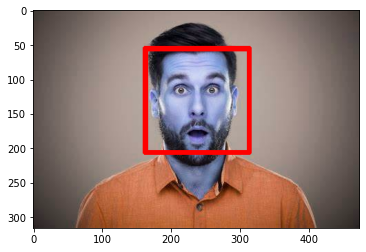

In [57]:
plt.imshow(frame)

In [58]:
get_Class(frame)

found
[[1.5388549e-07 4.4283759e-09 5.4721079e-07 6.7062811e-03 7.3046060e-05
  1.3208515e-08 9.9321997e-01]]


'surprise'

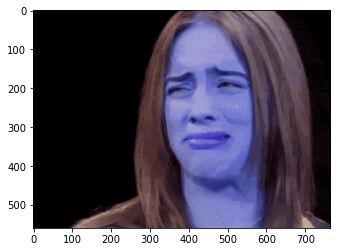

In [59]:
image1 = cv2.imread("C:/Users/lodha/Pictures/Screenshots/Screenshot (5722).png")
plt.imshow(image1)

In [60]:
get_Class(image1)

found
[[0.00168461 0.04460396 0.56206125 0.05162745 0.31047812 0.01631429
  0.01323031]]


'fear'

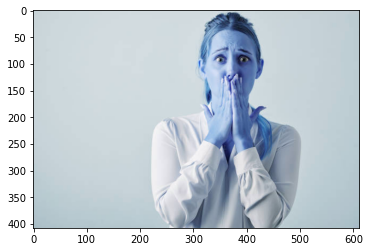

In [76]:
image3 = cv2.imread("C:/Users/lodha/Desktop/img11.jpg")
plt.imshow(image3)

In [77]:
get_Class(image3)

found
[[7.7554381e-05 1.1896422e-07 5.6163472e-04 6.7094584e-06 5.0527910e-07
  4.0852790e-08 9.9935335e-01]]


'surprise'

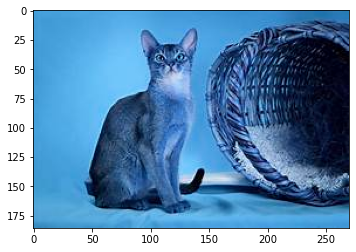

In [88]:
image4 = cv2.imread("C:/Users/lodha/Desktop/cat2.jfif")
plt.imshow(image4)

In [89]:
get_Class(image4)

NO FACE FOUND
[[1.3090673e-05 6.1638581e-05 1.3224883e-02 8.0942984e-05 1.6854135e-03
  7.9071376e-04 9.8414326e-01]]


'surprise'